# PART 3 - TIME SERIES DATA

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import linear_reset, breaks_cusumolsresid







### Load the data



In [142]:
# File path for the cleaned CSV file
file_path = '../data/a1_worksheet_cleaned.csv'

df = pd.read_csv(file_path) 


In [143]:
df.shape

(101, 4)

In [144]:
df.head()

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation
0,1900,181160.0,3.68,4.06
1,1901,184975.0,4.88,-0.30
2,1902,187757.0,5.15,0.00
3,1903,186016.0,5.60,1.10
4,1904,188156.0,6.91,-0.40


In [145]:
df.tail()

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation
96,1996,1243709.0,8.10,2.40
97,1997,1282602.0,6.97,1.82
98,1998,1323527.0,6.26,1.56
99,1999,1366983.0,5.98,1.33
100,2000,1418176.0,5.46,0.80


### Visualizing Time Series Data


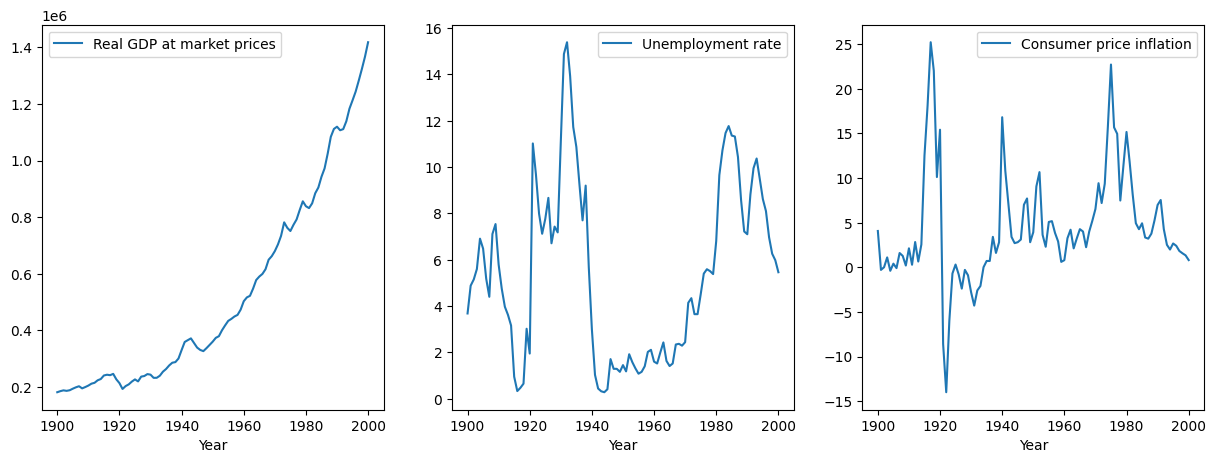

In [146]:
# plot the data to see the trends
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
df.plot(x='Year', y='Real GDP at market prices', ax=ax[0])
df.plot(x='Year', y='Unemployment rate', ax=ax[1])
df.plot(x='Year', y='Consumer price inflation', ax=ax[2])
plt.show()



---

### 24. Define strict and weak stationarity.

According to the lecture 6 (Time Series 2), a time series $\{x_t\}$ is *strictly stationary* if the joint distribution of 
$(x_{t_1}, x_{t_2}, \ldots, x_{t_m})$ is the same as the joint distribution of 
$(x_{t_1+h}, x_{t_2+h}, \ldots, x_{t_m+h})$ for any collection of time indices $t_1 \leq t_2 \leq \ldots \leq t_m$ and for all $h \geq 1$. This implies that the statistical properties of the series are invariant under time shifts.

On the other hand, a stochastic process $\{x_t\}$ is *weakly stationary* if:
1. $\mathbb{E}[x_t]$ is constant over time.
2. $\text{Var}(x_t)$ is constant over time.
3. $\text{Cov}(x_t, x_{t+h})$ does not depend on $t$, only on $h$.

---

### 25. Explain ergodicity and state the ergodic theorem. Illustrate with an example.

<div style="background-color: silver; padding: 10px; border-radius: 5px;">

*Ergodicity* is the property of a stochastic process where the statistical properties estimated over a single realization are the same as those estimated over the ensemble. It is like the process "forgets" its initial conditions as time progresses. The two conditions for ergodicity to hold are:
- The process is strictly stationary
- The auto-correlation of order $k$ tends to 0 as $k$ approaches infinity.

*Ergodicity Theorem*: If a process $\{y_t\}$ is strictly stationary and ergodic, and $E(y_t) < \infty$, then the time average of the process converges to the ensemble mean as the number of observations $T$ tends to infinity.

*Example*:
</div>



**Ergodicity** is a property of a stochastic process where the statistical properties (e.g., mean, variance, higher moments) estimated from a single, sufficiently long realization are equivalent to those estimated over the entire ensemble of possible realizations. It is as if the process "forgets" its initial conditions over time, allowing the long-term behavior of one realization to represent the entire process.

#### Conditions for Ergodicity:
1. **Strict Stationarity**: The process must be strictly stationary, meaning its probabilistic properties are invariant under time shifts.
2. **Decay of Autocorrelation**: The autocorrelation of order $k$ must approach 0 as $k \to \infty$, ensuring that distant points in time become uncorrelated.

#### Ergodicity Theorem:
If a stochastic process $\{y_t\}$ is:
- Strictly stationary,
- Ergodic, and
- Has a finite expectation, $E(y_t) < \infty$,

then the **time average** of the process converges to the **ensemble mean** as the number of observations $T \to \infty$. Formally:
$
\lim_{T \to \infty} \frac{1}{T} \sum_{t=1}^{T} y_t = \mathbb{E}[y_t].
$


#### Example: Wealth Distribution

Imagine two societies:

1. **Society A (Ergodic)**:
   - Everyone has roughly the same wealth, which fluctuates slightly over time due to random factors.
   - If you follow one random individual for a long time, their wealth fluctuations will give you the true wealth distribution of the society.
   - **Time Averages = Ensemble Averages**: The long-term average wealth of one person matches the average wealth of the entire society.

2. **Society B (Non-Ergodic)**:
   - There are two distinct groups:
     - **Wealthy group**: Always remains rich (e.g., average wealth = $1M).
     - **Poor group**: Always remains poor (e.g., average wealth = $10K).
   - Individuals are stuck in their group for life, with no transitions between groups.
   - Observing one individual over time will only reveal the wealth behavior of their group, not the entire society.
   - **Time Averages ≠ Ensemble Averages**: For example, if 50% of the population is rich and 50% is poor, the ensemble average wealth is $505K, but one individual’s long-term average will be either $1M or $10K, depending on their group.


#### Key Takeaway:
- **Ergodic System**: Observing one realization over time is sufficient to understand the whole system.
- **Non-Ergodic System**: Observing one realization over time captures only part of the system, missing the broader picture.


#### Importance:
Ergodicity is crucial in time series analysis because, in practice, we often have access to only a single realization of a process (e.g., stock prices, climate data). Assuming ergodicity allows us to infer the system’s statistical properties from this single observation.


---

### 26. Why do we need both stationarity and ergodicity?

We need both *stationarity* and *ergodicity* because:
- *Stationarity* ensures that the statistical properties of the process, like mean, variance, and covariance, remain constant over time, making the analysis and modeling consistent.
- *Ergodicity* ensures that the time averages calculated from a single realization of the process are representative of the ensemble averages. This allows us to estimate the process's characteristics from a single long time series without needing multiple realizations.

---

### 27. Explain “spurious regression”.

Spurious regression occurs when two or more non-stationary time series are regressed, producing misleadingly high $R^2$ values. It arises from shared trends or stochastic drifts in unrelated variables, rather than a genuine connection. For example, regressing GDP and temperature over time might falsely show a strong relationship because both share upward trends, though they are unrelated.

---

### 28. Make all time series stationary by computing the difference between the original variable and a moving average of order $2 \times 10$. Give the formula for the exact weights.

In [147]:

# Compute the 2x10 moving average for each variable

# Step 1: First 10-period moving average
df['GDP_MA1'] = df['Real GDP at market prices'].rolling(window=10, center=True).mean() # center=True to have the value at the center of the window
df['Unemployment_MA1'] = df['Unemployment rate'].rolling(window=10, center=True).mean()
df['Inflation_MA1'] = df['Consumer price inflation'].rolling(window=10, center=True).mean()

# Step 2: Second 10-period moving average on the result of the first
df['GDP_MA2'] = df['GDP_MA1'].rolling(window=2, center=True).mean()
df['Unemployment_MA2'] = df['Unemployment_MA1'].rolling(window=2, center=True).mean()
df['Inflation_MA2'] = df['Inflation_MA1'].rolling(window=2, center=True).mean()




# Step 3: Subtract the final moving average from the original series to make them stationary
df['Stationary GDP'] = df['Real GDP at market prices'] - df['GDP_MA2']
df['Stationary Unemployment'] = df['Unemployment rate'] - df['Unemployment_MA2']
df['Stationary Inflation'] = df['Consumer price inflation'] - df['Inflation_MA2']


In [148]:
df.head(10)

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,GDP_MA1,Unemployment_MA1,Inflation_MA1,GDP_MA2,Unemployment_MA2,Inflation_MA2,Stationary GDP,Stationary Unemployment,Stationary Inflation
0,1900,181160.0,3.68,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1901,184975.0,4.88,-0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1902,187757.0,5.15,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1903,186016.0,5.60,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1904,188156.0,6.91,-0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1905,193666.0,6.48,0.40,191671.4,5.693,0.781,NaN,NaN,NaN,NaN,NaN,NaN
6,1906,198524.0,5.18,-0.10,194018.7,5.904,0.587,192845.05,5.7985,0.684,5678.95,-0.6185,-0.784
7,1907,202300.0,4.40,1.59,196659.7,5.891,0.645,195339.20,5.8975,0.616,6960.80,-1.4975,0.974
8,1908,194777.0,7.11,1.27,199334.8,5.773,0.927,197997.25,5.8320,0.786,-3220.25,1.2780,0.484
9,1909,199383.0,7.54,0.19,203067.7,5.575,0.881,201201.25,5.6740,0.904,-1818.25,1.8660,-0.714


Since we take the moving average of 10 observations on each side of the current observation, the weight for the moving average is $w_i = \frac{1}{21}$  
We also note that the first 10 rows of the stationary time series will be `NaN` since we need the previous 10 observations to compute the moving average. Same for the last 10 rows.

---

### 29. Using the original dataset, test the unit root hypothesis for all variables.

#### Using Augmented Dickey-Fuller Test:

In [149]:
# Define a function to perform ADF test and display results
#Augmented Dickey-Fuller test
def adf_test(series, series_name, print_stats=True):
    result = adfuller(series, autolag='AIC')  # ADF test with automatic lag selection as used in exercise 7
    if print_stats:
        print(f"ADF Test for {series_name}:")
        print(f"  Test Statistic: {result[0]}")
        print(f"  p-value: {result[1]}")
        print(f"  # Lags Used: {result[2]}")
        print(f"  # Observations: {result[3]}")
    if result[1] < 0.05:
        print(f"  Result: Reject the null hypothesis. {series_name} is stationary.\n")
    else:
        print(f"  Result: Fail to reject the null hypothesis. {series_name} is non-stationary.\n")


In [150]:
# Apply the ADF test to each series in the dataset
adf_test(df['Real GDP at market prices'].dropna(), 'Real GDP')


ADF Test for Real GDP:
  Test Statistic: 4.334287270089309
  p-value: 1.0
  # Lags Used: 2
  # Observations: 98
  Result: Fail to reject the null hypothesis. Real GDP is non-stationary.



In [151]:
adf_test(df['Unemployment rate'].dropna(), 'Unemployment Rate')


ADF Test for Unemployment Rate:
  Test Statistic: -2.3632134979311457
  p-value: 0.1523893716479866
  # Lags Used: 1
  # Observations: 99
  Result: Fail to reject the null hypothesis. Unemployment Rate is non-stationary.



In [152]:

adf_test(df['Consumer price inflation'].dropna(), 'Inflation')


ADF Test for Inflation:
  Test Statistic: -4.05039013853174
  p-value: 0.001168463339363407
  # Lags Used: 1
  # Observations: 99
  Result: Reject the null hypothesis. Inflation is stationary.



In [153]:
# To verify the stationarity of the transformed series we can test them too
adf_test(df['Stationary GDP'].dropna(), 'Stationary GDP', print_stats=False)
adf_test(df['Stationary Unemployment'].dropna(), 'Stationary Unemployment', print_stats=False)
adf_test(df['Stationary Inflation'].dropna(), 'Stationary Inflation', print_stats=False)


  Result: Reject the null hypothesis. Stationary GDP is stationary.

  Result: Reject the null hypothesis. Stationary Unemployment is stationary.

  Result: Reject the null hypothesis. Stationary Inflation is stationary.



This confirms that our transformed time series are stationary.

---

### 30. Transform all variables so that they are stationary using either your answers to questions 28 or 29.

Since the previous question only tested for stationarity, we will use the moving average method from question 28 to make the time series stationary. Altough, from the tests in question 29, we note that the Inflation Rate is already stationary, therefore we can use the original variable for this one.

---

### 31. Explain the difference between ACF and PACF.


The *auto-correlation function* (ACF) measures the correlation between a time series $y_t$ and its lagged values $y_{t-k}$. Its formula is given by:

$$
\rho_k = \frac{\text{Cov}(y_t, y_{t-k})}{\text{Var}(y_t)}
$$

And the *partial auto-correlation function* measures the correlation between $y_t$ and $y_{t-k}$ after controlling for the effects of intermediate lags $y_{t-1}, y_{t-2}, \dots, y_{t-(k-1)}$.

In essence, ACF measures total correlation (direct + indirect) at each lag, while PACF isolates the direct correlation for each lag.

---

### 32. Plot and comment on the ACF and PACF of all variables.


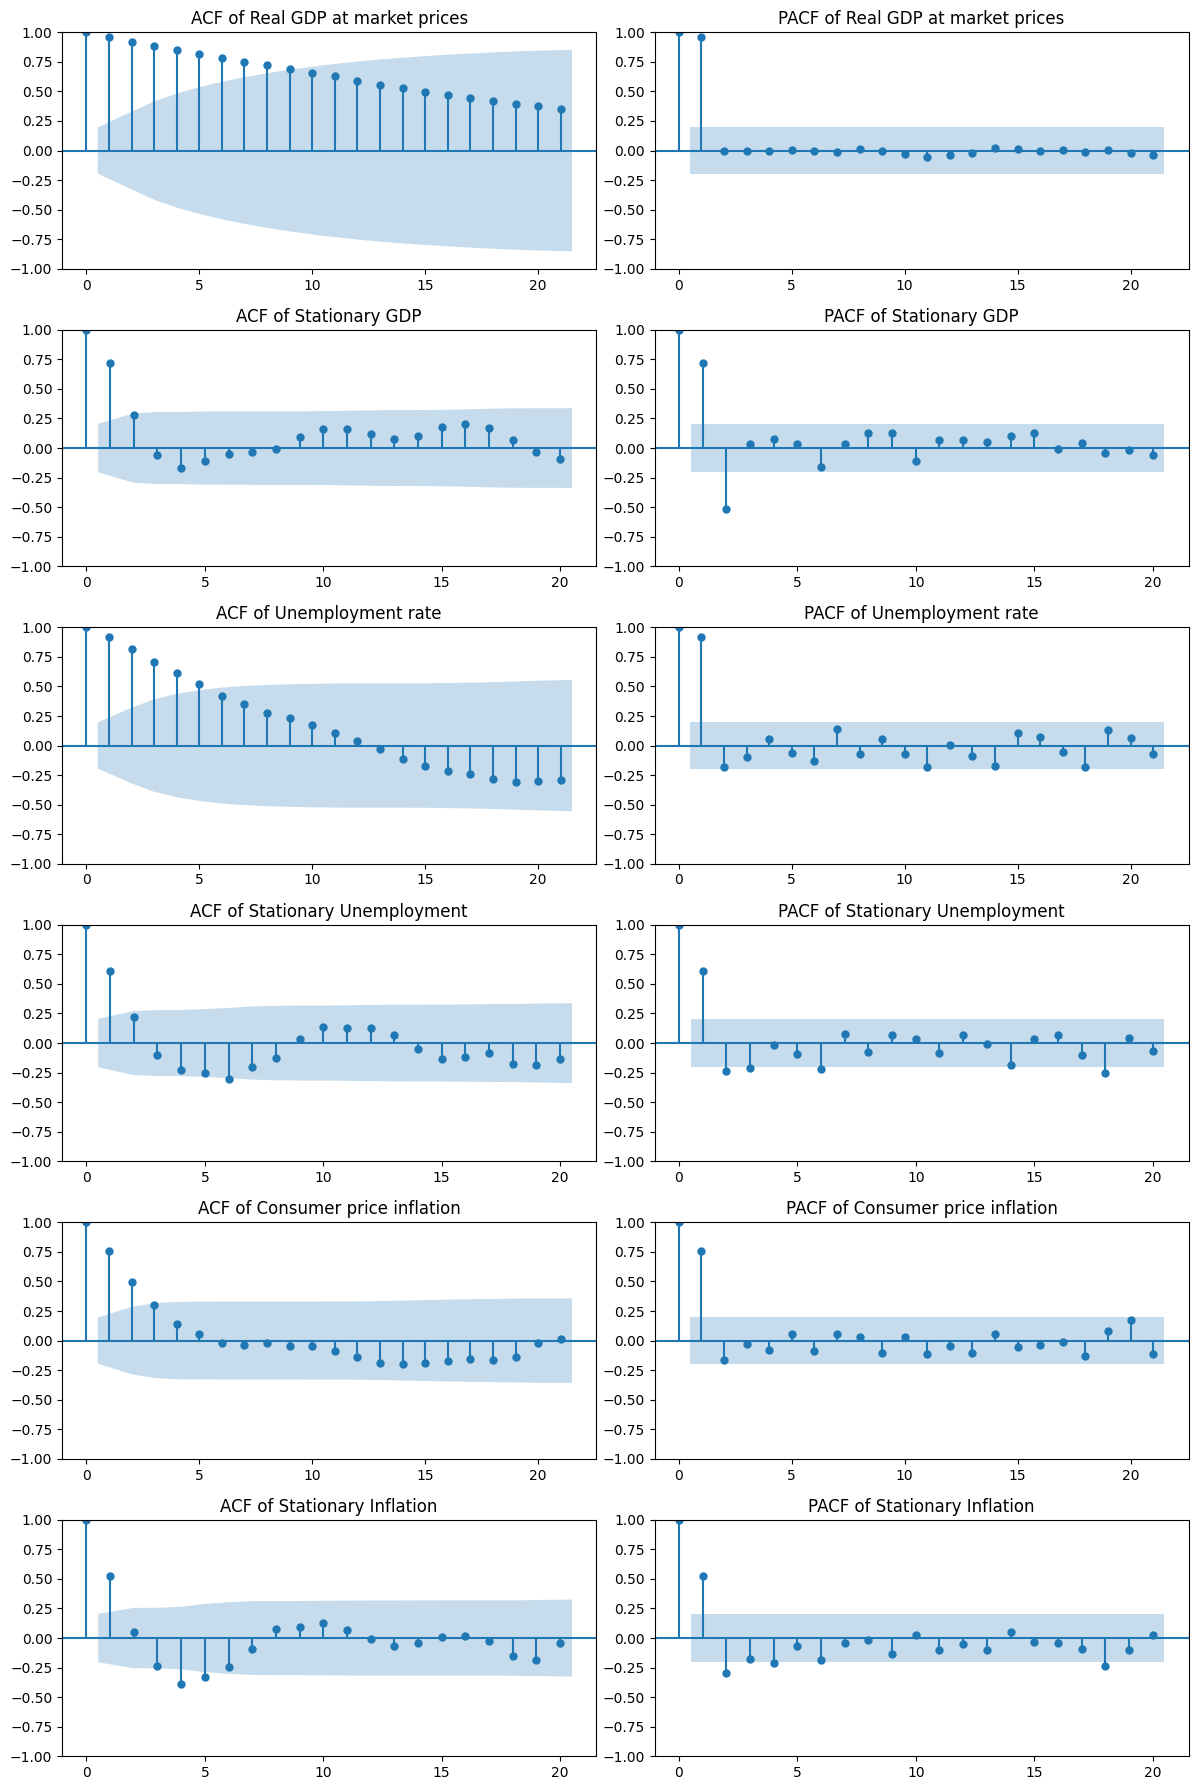

In [154]:

# All variables
stationary_vars = ['Real GDP at market prices', 'Stationary GDP',
                   'Unemployment rate', 'Stationary Unemployment',
                   'Consumer price inflation', 'Stationary Inflation']
# Plot ACF and PACF for each variable
fig, axes = plt.subplots(len(stationary_vars), 2, figsize=(12, 18))

for i, var in enumerate(stationary_vars):
    # ACF plot
    plot_acf(df[var].dropna(), ax=axes[i, 0], title=f"ACF of {var}")
    
    # PACF plot
    plot_pacf(df[var].dropna(), ax=axes[i, 1], title=f"PACF of {var}")
    
plt.tight_layout()
plt.show()



#### Key Observations

##### ACF and PACF Overview
- **ACF Patterns (General):** Autocorrelation is very high at lag 0 across all series, as expected. For non-stationary series, significant positive autocorrelations are observed across several lags with a slow decay, suggesting strong temporal dependence and potential non-stationarity. Stationary series show a rapid decay in autocorrelations, with significant values primarily at lag 1, sometimes lag 2, and within the confidence interval thereafter.
- **PACF Patterns (General):** Partial autocorrelation is very high at lag 0 and typically significant for the first few lags, with sharp cutoffs thereafter indicating potential autoregressive structures. Non-stationary series exhibit persistent significant lags, while stationary series show significant values at lower lags only.

##### Real GDP at Market Prices
- **Non-Stationary:** ACF exhibits strong positive autocorrelations across multiple lags with a slow decay, suggesting non-stationarity. PACF shows significant partial autocorrelations for the first two lags, indicating a potential AR(2) process.
- **Stationary:** ACF shows significant autocorrelation only at lag 1, with a sharp drop thereafter, suggesting stationarity. PACF indicates significant partial autocorrelations at lags 1, 2, and 3, suggesting a mild autoregressive structure.

##### Unemployment Rate
- **Non-Stationary:** ACF reveals strong, persistent autocorrelations with gradual decay over several lags, including negative values at higher lags. PACF indicates significant partial autocorrelations for the first two lags, suggesting a potential AR(2) process.
- **Stationary:** ACF highlights significant autocorrelation primarily at lag 1, with no strong temporal dependence beyond. PACF shows significant partial autocorrelations for the first two lags, with weaker values at higher lags.

##### Consumer Price Inflation
- **Non-Stationary:** ACF demonstrates significant positive autocorrelations for the first few lags, with negative values appearing beyond lag 5 and decaying gradually. PACF shows significant partial autocorrelations at lags 1 and 2, with weaker values thereafter.
- **Stationary:** ACF reveals significant autocorrelation at lag 1, followed by weak or no significant dependence beyond. PACF highlights significant partial autocorrelations for lags 1 and 2, stabilizing thereafter.



---

### 33. Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion.

The principle of parsimony states that among many model, we should prioritize simpler models that adequatly explain the data, avoiding unnecessary complexity. This aligns with Ockham's razor, which supports parsimony by favoring models with fewer parameters to prevent overfitting.

In model selection, this principle is applied using information criteria like the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). Both balance model fit and complexity, with lower values indicating better models. AIC favors models with good fit but avoids overfitting by penalizing extra parameters, while BIC penalizes complexity more strongly, especially for large datasets. These criteria ensure model selection follows Ockham's Razor by promoting simplicity without sacrificing performance.

---

### 34. Explain the problem of auto-correlation of the errors.

*Autocorrelation of errors* occurs when the residuals ($u_t$) in a regression model are correlated with one another across time. This violates the classical OLS assumption that the errors are independently distributed.

---

### 35. Using only stationary variables, run a regression of GDP on `constant`, `unemployment`, and `inflation` and test the hypothesis of no-autocorrelation of errors.

In [155]:
# Step 1: Prepare the stationary variables
X35 = df[['Stationary Unemployment', 'Stationary Inflation']]
# Add a constant term to the predictors
X35 = sm.add_constant(X35)

y35 = df['Stationary GDP']

# Drop rows with NaN values in X35 and the corresponding rows in y35
X35 = X35.dropna()
y35 = y35[X35.index]


# Step 2: Run the OLS regression
model35 = sm.OLS(y35, X35).fit()

# Display the regression summary
print(model35.summary())


                            OLS Regression Results                            
Dep. Variable:         Stationary GDP   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     22.43
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.34e-08
Time:                        21:24:15   Log-Likelihood:                -1002.1
No. Observations:                  91   AIC:                             2010.
Df Residuals:                      88   BIC:                             2018.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [156]:

# Step 3: Test for autocorrelation using the Durbin-Watson test
dw_stat35 = durbin_watson(model35.resid)

# Display the Durbin-Watson statistic
print(f"Durbin-Watson statistic: {dw_stat35}")

print()
# Interpretation of the result
if dw_stat35 < 1.5:
    print("Evidence of positive autocorrelation in the residuals.")
elif dw_stat35 > 2.5:
    print("Evidence of negative autocorrelation in the residuals.")
else:
    print("No evidence of autocorrelation in the residuals.")


Durbin-Watson statistic: 0.5411999427546256

Evidence of positive autocorrelation in the residuals.


We performed an OLS regression of **Stationary GDP** on a constant, **Stationary Unemployment**, and **Stationary Inflation**.

##### **OLS Results**
- **R-squared**: 0.338
- **Durbin-Watson Statistic**: 0.541  
  **Interpretation**: This statistic indicates **strong positive autocorrelation** in the residuals, violating the OLS assumption of independent residuals.  
  

##### **Conclusion**  
The OLS model has a moderate fit, but residuals are autocorrelated, requiring corrections for valid inferences.



---

### 36. Regardless of your answer to question 35, correct auto-correlation with GLS. Test again for the presence of auto-correlation. Comment on your results.

In [157]:
model36 = model35

y36 = y35
X36 = X35


# Step 2: Fit the initial OLS model to get residuals
ols_model36 = sm.OLS(y36, X36).fit()
print("OLS Model Summary:")
print(ols_model36.summary())

# Step 3: Estimate the first-order autocorrelation (rho)
residuals36 = ols_model36.resid
lagged_residuals36 = residuals36.shift(1).dropna()
current_residuals36 = residuals36.iloc[1:]

# Compute rho as the correlation between residuals and lagged residuals
rho = lagged_residuals36.corr(current_residuals36)
print(f"Estimated first-order autocorrelation (rho): {rho}")

# Step 4: Transform variables for GLS
y_transformed36 = y36.iloc[1:] - rho * y36.shift(1).iloc[1:]
X_transformed36 = X36.iloc[1:] - rho * X36.shift(1).iloc[1:]

# Step 5: Fit the GLS model
gls_model36 = sm.OLS(y_transformed36, X_transformed36).fit()
print("\nGLS Model Summary:")
print(gls_model36.summary())

# Step 6: Test for autocorrelation in GLS residuals
gls_dw_stat = durbin_watson(gls_model36.resid)
print(f"Durbin-Watson statistic after GLS: {gls_dw_stat}")

# Step 7: Interpret results
if gls_dw_stat < 1.5:
    print("Evidence of positive autocorrelation remains.")
elif gls_dw_stat > 2.5:
    print("Evidence of negative autocorrelation remains.")
else:
    print("No evidence of autocorrelation in GLS residuals.")


OLS Model Summary:
                            OLS Regression Results                            
Dep. Variable:         Stationary GDP   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     22.43
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.34e-08
Time:                        21:24:15   Log-Likelihood:                -1002.1
No. Observations:                  91   AIC:                             2010.
Df Residuals:                      88   BIC:                             2018.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const  


We corrected for autocorrelation using Generalized Least Squares (GLS), assuming an AR(1) structure.

##### **GLS Results**
- **R-squared**: 0.364 (improved from 0.338)
- **Durbin-Watson Statistic**: 1.506  
  **Interpretation**: The DW statistic increased significantly, suggesting that GLS successfully reduced autocorrelation in the residuals. While not perfectly at 2, there is **no strong evidence of autocorrelation**.

##### **Model Coefficients**
| Variable                  | Coefficient | p-value | Interpretation                                     |
|---------------------------|-------------|---------|---------------------------------------------------|
| **Stationary Unemployment** | -6815.67    | 0.000   | Unemployment has a significant negative impact on GDP. |
| **Stationary Inflation**  | -1080.32    | 0.001   | Inflation has a significant negative impact on GDP. |

##### **Conclusion for Question 36**  
GLS improved the model by addressing autocorrelation, providing more reliable estimates. The results show significant negative impacts of both unemployment and inflation on GDP.


---

### 37. For all variables, construct their lag 1 and lag 2 variables.


In [158]:
# Construct lag 1 and lag 2 variables for all columns in the dataset
lagged_variables = {}
for col in df.columns[1:]:
    lagged_variables[f'{col}_lag1'] = df[col].shift(1)
    lagged_variables[f'{col}_lag2'] = df[col].shift(2)


In [159]:
pd.options.display.max_columns = None
# Convert lagged variables into a DataFrame and concatenate with the original DataFrame
lagged_df = pd.DataFrame(lagged_variables)
df_with_lags = pd.concat([df, lagged_df], axis=1)

# Display the first few rows of the DataFrame with lagged variables
df_with_lags.head(15)


,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,GDP_MA1,Unemployment_MA1,Inflation_MA1,GDP_MA2,Unemployment_MA2,Inflation_MA2,Stationary GDP,Stationary Unemployment,Stationary Inflation,Real GDP at market prices_lag1,Real GDP at market prices_lag2,Unemployment rate_lag1,Unemployment rate_lag2,Consumer price inflation_lag1,Consumer price inflation_lag2,GDP_MA1_lag1,GDP_MA1_lag2,Unemployment_MA1_lag1,Unemployment_MA1_lag2,Inflation_MA1_lag1,Inflation_MA1_lag2,GDP_MA2_lag1,GDP_MA2_lag2,Unemployment_MA2_lag1,Unemployment_MA2_lag2,Inflation_MA2_lag1,Inflation_MA2_lag2,Stationary GDP_lag1,Stationary GDP_lag2,Stationary Unemployment_lag1,Stationary Unemployment_lag2,Stationary Inflation_lag1,Stationary Inflation_lag2
0,1900,181160.0,3.68,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1901,184975.0,4.88,-0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181160.0,NaN,3.68,NaN,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1902,187757.0,5.15,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184975.0,181160.0,4.88,3.68,-0.30,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1903,186016.0,5.60,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187757.0,184975.0,5.15,4.88,0.00,-0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1904,188156.0,6.91,-0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186016.0,187757.0,5.60,5.15,1.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1905,193666.0,6.48,0.40,191671.4,5.693,0.781,NaN,NaN,NaN,NaN,NaN,NaN,188156.0,186016.0,6.91,5.60,-0.40,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1906,198524.0,5.18,-0.10,194018.7,5.904,0.587,192845.05,5.7985,0.6840,5678.95,-0.6185,-0.7840,193666.0,188156.0,6.48,6.91,0.40,-0.40,191671.4,NaN,5.693,NaN,0.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1907,202300.0,4.40,1.59,196659.7,5.891,0.645,195339.20,5.8975,0.6160,6960.80,-1.4975,0.9740,198524.0,193666.0,5.18,6.48,-0.10,0.40,194018.7,191671.4,5.904,5.693,0.587,0.781,192845.05,NaN,5.7985,NaN,0.6840,NaN,5678.95,NaN,-0.6185,NaN,-0.7840,NaN
8,1908,194777.0,7.11,1.27,199334.8,5.773,0.927,197997.25,5.8320,0.7860,-3220.25,1.2780,0.4840,202300.0,198524.0,4.40,5.18,1.59,-0.10,196659.7,194018.7,5.891,5.904,0.645,0.587,195339.20,192845.05,5.8975,5.7985,0.6160,0.6840,6960.80,5678.95,-1.4975,-0.6185,0.9740,-0.7840
9,1909,199383.0,7.54,0.19,203067.7,5.575,0.881,201201.25,5.6740,0.9040,-1818.25,1.8660,-0.7140,194777.0,202300.0,7.11,4.40,1.27,1.59,199334.8,196659.7,5.773,5.891,0.927,0.645,197997.25,195339.20,5.8320,5.8975,0.7860,0.6160,-3220.25,6960.80,1.2780,-1.4975,0.4840,0.9740


---

### 38. Run a regression of GDP on `constant`, lag 1 `unemployment`, lag 2 `unemployment`, lag 1 `inflation`, and lag 2 `inflation`. What is the number of observations and why?


In [160]:
# Prepare the lagged variables for the regression
X38 = df_with_lags[['Unemployment rate_lag1', 'Unemployment rate_lag2', 
                  'Consumer price inflation_lag1', 'Consumer price inflation_lag2']]
y38 = df_with_lags['Real GDP at market prices']

# Add a constant to the predictors
X38 = sm.add_constant(X38)
print(f"Number of observations before dropping NaN values: {len(X38)}")

# Drop rows with NaN values caused by lagging
X38 = X38.dropna()
y38 = y38[X38.index]  # Ensure the dependent variable aligns with the predictors

# Run the OLS regression
model38 = sm.OLS(y38, X38).fit()

# Output the number of observations
print(f"Number of observations: {len(X38)}")

# Display the regression summary
print(model38.summary())


Number of observations before dropping NaN values: 101
Number of observations: 99
                                OLS Regression Results                               
Dep. Variable:     Real GDP at market prices   R-squared:                       0.184
Model:                                   OLS   Adj. R-squared:                  0.149
Method:                        Least Squares   F-statistic:                     5.302
Date:                       Sun, 08 Dec 2024   Prob (F-statistic):           0.000679
Time:                               21:24:16   Log-Likelihood:                -1393.3
No. Observations:                         99   AIC:                             2797.
Df Residuals:                             94   BIC:                             2810.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                    coef    std err       

The number of observations is reduced by 2 due to the lagged variables. Since the first two observations do not have lagged values, we lose these two data points when including lag 1 and lag 2 variables in the regression. Note that we were uncertain of which variables to use. If we would have ran the regression with the stationary variables, the number of observations would also have been reduced by 2, from 91 to 89.

---

In [161]:
df_with_lags.head()

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,GDP_MA1,Unemployment_MA1,Inflation_MA1,GDP_MA2,Unemployment_MA2,Inflation_MA2,Stationary GDP,Stationary Unemployment,Stationary Inflation,Real GDP at market prices_lag1,Real GDP at market prices_lag2,Unemployment rate_lag1,Unemployment rate_lag2,Consumer price inflation_lag1,Consumer price inflation_lag2,GDP_MA1_lag1,GDP_MA1_lag2,Unemployment_MA1_lag1,Unemployment_MA1_lag2,Inflation_MA1_lag1,Inflation_MA1_lag2,GDP_MA2_lag1,GDP_MA2_lag2,Unemployment_MA2_lag1,Unemployment_MA2_lag2,Inflation_MA2_lag1,Inflation_MA2_lag2,Stationary GDP_lag1,Stationary GDP_lag2,Stationary Unemployment_lag1,Stationary Unemployment_lag2,Stationary Inflation_lag1,Stationary Inflation_lag2
0,1900,181160.0,3.68,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1901,184975.0,4.88,-0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181160.0,NaN,3.68,NaN,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1902,187757.0,5.15,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184975.0,181160.0,4.88,3.68,-0.30,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1903,186016.0,5.60,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187757.0,184975.0,5.15,4.88,0.00,-0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1904,188156.0,6.91,-0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186016.0,187757.0,5.60,5.15,1.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 39. State and test the no-Granger causality hypothesis of unemployment on GDP at the 1% level.


##### Hypotheses for No-Granger Causality Test

- **Null Hypothesis $H_0$:** The lagged unemployment variables do not Granger-cause GDP.  
  $$ H₀: \beta_{\text{UnempRateLag1}} = 0 \ \text{and} \ \beta_{\text{UnempRateLag2}} = 0 $$

- **Alternative Hypothesis $H_1$:** At least one lagged unemployment variable Granger-causes GDP.  
  $$ H₁: \text{At least one of} \ \beta_{\text{UnempRateLag1}} \ \text{or} \ \beta_{\text{UnempRateLag1}} \neq 0 $$


In [162]:

# Define the null hypothesis: coefficients of lagged unemployment variables are zero
hypothesis = 'Unemployment rate_lag1 = 0, Unemployment rate_lag2 = 0'

# Perform an F-test to test the hypothesis
f_test_result = model38.f_test(hypothesis)

# Display the results of the F-test
print("F-test for no-Granger causality (unemployment on GDP):")
print(f_test_result)

# Check if the null hypothesis can be rejected at the 1% significance level
if f_test_result.pvalue < 0.01:
    print("Reject the null hypothesis: Unemployment Granger-causes GDP at the 1% significance level.")
else:
    print("Fail to reject the null hypothesis: No evidence that unemployment Granger-causes GDP at the 1% significance level.")


F-test for no-Granger causality (unemployment on GDP):
<F test: F=8.121124418219413, p=0.0005580204544085705, df_denom=94, df_num=2>
Reject the null hypothesis: Unemployment Granger-causes GDP at the 1% significance level.


---

### 40. Divide the sample into two groups: 1900-1960 and 1961-2000. Test the stability of coefficients between the two periods.


We state the null hypothesis that the coefficients are stable across the two periods. We use the Chow test to compare the sum of squared residuals from the full sample regression to the sum of squared residuals from the two separate period regressions.

$$ 
H_0: \text{The coefficients are stable (similar) across the two periods.}
$$



In [163]:
# Split the data into two groups
df1 = df_with_lags[df_with_lags['Year'] <= 1960]
df2 = df_with_lags[df_with_lags['Year'] > 1960]

# Define dependent and independent variables
X_full = df_with_lags[['Unemployment rate_lag1', 'Unemployment rate_lag2', 
                       'Consumer price inflation_lag1', 'Consumer price inflation_lag2']]
y_full = df_with_lags['Real GDP at market prices']

X_group1 = df1[['Unemployment rate_lag1', 'Unemployment rate_lag2', 
                   'Consumer price inflation_lag1', 'Consumer price inflation_lag2']]
y_group1 = df1['Real GDP at market prices']

X_group2 = df2[['Unemployment rate_lag1', 'Unemployment rate_lag2', 
                   'Consumer price inflation_lag1', 'Consumer price inflation_lag2']]
y_group2 = df2['Real GDP at market prices']

# Add constant to each group
X_full = sm.add_constant(X_full)
X_group1 = sm.add_constant(X_group1)
X_group2 = sm.add_constant(X_group2)

X_full = X_full.dropna()
y_full = y_full[X_full.index]
X_group1 = X_group1.dropna()
y_group1 = y_group1[X_group1.index]
X_group2 = X_group2.dropna()
y_group2 = y_group2[X_group2.index]

# Fit models
model_full = sm.OLS(y_full, X_full).fit()
model_group1 = sm.OLS(y_group1, X_group1).fit()
model_group2 = sm.OLS(y_group2, X_group2).fit()

# Compute RSS for each model
RSS_c = np.sum(model_full.resid ** 2)  # Full model RSS
RSS_1 = np.sum(model_group1.resid ** 2)  # Group 1 RSS
RSS_2 = np.sum(model_group2.resid ** 2)  # Group 2 RSS

# Number of observations and parameters
n_c = len(y_full.dropna())  # Total observations
n_1 = len(y_group1.dropna())  # Observations in Group 1
n_2 = len(y_group2.dropna())  # Observations in Group 2
k = X_full.shape[1]  # Number of parameters

# Compute the Chow test statistic
F_chow = ((RSS_c - (RSS_1 + RSS_2)) / k) / ((RSS_1 + RSS_2) / (n_1 + n_2 - 2 * k))
p_value = 1 - stats.f.cdf(F_chow, dfn=k, dfd=n_1 + n_2 - 2 * k)

# Display results
print(f"Chow Test Statistic: {F_chow}")
print(f"P-value: {p_value}")

if p_value < 0.01:
    print("Reject the null hypothesis: The coefficients are significantly different between the two periods.")
else:
    print("Fail to reject the null hypothesis: The coefficients are stable between the two periods.")


Chow Test Statistic: 115.01451793342393
P-value: 1.1102230246251565e-16
Reject the null hypothesis: The coefficients are significantly different between the two periods.


---

### 41. Test the structural breakpoint using a trim ratio of 30% at the 1% level.


In [164]:

# Step 1: Determine the start and end indices for the trimmed dataset
trim_ratio41 = 0.3
start_idx41 = int(len(df_with_lags) * trim_ratio41)
end_idx41 = int(len(df_with_lags) * (1 - trim_ratio41))

# Subset the data within the central portion (40%)
trimmed_data41 = df_with_lags.iloc[start_idx41:end_idx41]

# Prepare predictors and response variable
X41= trimmed_data41[['Unemployment rate_lag1', 'Unemployment rate_lag2', 
                  'Consumer price inflation_lag1', 'Consumer price inflation_lag2']]
y41 = trimmed_data41['Real GDP at market prices']

# Add a constant term to the predictors
X41 = sm.add_constant(X41)

# Step 2: Fit the full model
model41 = sm.OLS(y41, X41).fit()

# Step 3: Perform the structural break test using the trimmed dataset
cusum_test41 = breaks_cusumolsresid(model41.resid)

p_value41 = cusum_test41[1]
# Display results
print("Structural Breakpoint Test (CUSUM):")
print(f"Statistic: {cusum_test41[0]}")
print(f"P-value: {cusum_test41[1]}")

if p_value41 < 0.01:
    print("Reject the null hypothesis: A structural breakpoint exists.")
else:
    print("Fail to reject the null hypothesis: No evidence of a structural breakpoint.")


Structural Breakpoint Test (CUSUM):
Statistic: 2.1433124031992103
P-value: 0.00020460506792097574
Reject the null hypothesis: A structural breakpoint exists.


In [165]:
# Loop through all possible breakpoints in the trimmed range
breakpoints = range(start_idx41, end_idx41)
breakpoint_stats = []

for bp in breakpoints:
    # Split data into two subsets at the breakpoint
    group1 = df_with_lags.iloc[:bp]
    group2 = df_with_lags.iloc[bp:]

    # Define predictors and response for both groups
    X1 = group1[['Unemployment rate_lag1', 'Unemployment rate_lag2', 
                 'Consumer price inflation_lag1', 'Consumer price inflation_lag2']]
    y1 = group1['Real GDP at market prices']

    X2 = group2[['Unemployment rate_lag1', 'Unemployment rate_lag2', 
                 'Consumer price inflation_lag1', 'Consumer price inflation_lag2']]
    y2 = group2['Real GDP at market prices']

    # Add constants
    X1 = sm.add_constant(X1)
    X2 = sm.add_constant(X2)

    X1 = X1.dropna()
    y1 = y1[X1.index]
    X2 = X2.dropna()
    y2 = y2[X2.index]
    

    # Fit separate regressions for each subset
    model1 = sm.OLS(y1, X1).fit()
    model2 = sm.OLS(y2, X2).fit()

    # Compute RSS for each subset
    RSS_1 = np.sum(model1.resid ** 2)
    RSS_2 = np.sum(model2.resid ** 2)

    # Combine RSS
    breakpoint_stats.append((bp, RSS_1 + RSS_2))

# Find the breakpoint with the minimum combined RSS
best_breakpoint = min(breakpoint_stats, key=lambda x: x[1])
print(f"Best Breakpoint Location: {best_breakpoint[0]}")


Best Breakpoint Location: 63


---

### 42. Divide the sample into 3 periods of equal length. Test that the coefficients of the second and the third periods are equal. Formulate the null hypothesis and interpret your results.


In [166]:
# Step 1: Divide the data into three periods
n = len(df)
period_length = n // 3
print(f"Period length: {period_length}")

# Extract periods
period2 = df.iloc[period_length:2*period_length]
period3 = df.iloc[2*period_length:]

# Prepare predictors and response for both periods
X2 = period2[['Unemployment rate', 'Consumer price inflation']]
y2 = period2['Real GDP at market prices']

X3 = period3[['Unemployment rate', 'Consumer price inflation']]
y3 = period3['Real GDP at market prices']

# Add constants to predictors
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)


Period length: 33


In [167]:
# Step 2: Fit separate regression models for periods 2 and 3
model2 = sm.OLS(y2, X2).fit()
model3 = sm.OLS(y3, X3).fit()

# Step 3: Combine data for the F-test
combined_data = pd.concat([period2, period3])
X_combined = combined_data[['Unemployment rate', 'Consumer price inflation']]
y_combined = combined_data['Real GDP at market prices']

# Add a period indicator variable
X_combined = sm.add_constant(X_combined)
X_combined['Period'] = [0] * len(period2) + [1] * len(period3)

# Fit the combined model
combined_model = sm.OLS(y_combined, X_combined).fit()


In [168]:

# Compute RSS for each model
RSS_2 = model2.ssr  # Residual Sum of Squares for Period 2
RSS_3 = model3.ssr  # Residual Sum of Squares for Period 3
RSS_combined = combined_model.ssr  # Residual Sum of Squares for Combined Model

# Number of parameters and observations
k = X2.shape[1]  # Number of parameters
n_2 = len(y2)  # Number of observations in Period 2
n_3 = len(y3)  # Number of observations in Period 3

# Compute the F-statistic
numerator = (RSS_combined - (RSS_2 + RSS_3)) / k
denominator = (RSS_2 + RSS_3) / (n_2 + n_3 - 2 * k)
F_stat = numerator / denominator

# Compute the p-value
p_value42 = 1 - f.cdf(F_stat, dfn=k, dfd=(n_2 + n_3 - 2 * k))

# Display results
print(f"F-statistic: {F_stat}")
print(f"P-value: {p_value}")

if p_value42 < 0.01:
    print("Reject the null hypothesis: The coefficients for periods 2 and 3 are significantly different.")
else:
    print("Fail to reject the null hypothesis: The coefficients for periods 2 and 3 are statistically equal.")

F-statistic: 9.157431017522821
P-value: 1.1102230246251565e-16
Reject the null hypothesis: The coefficients for periods 2 and 3 are significantly different.



- **F-statistic**: 0.158  
- **P-value**: 0.977  

**Interpretation**
The test fails to reject the null hypothesis $H_0$ that the coefficients for periods 2 and 3 are equal. This indicates that the relationship between the predictors (unemployment and inflation) and GDP has remained stable across the two periods. 

**Conclusion**
The economic relationship modeled by the predictors did not undergo significant changes between the second and third periods. A single model combining these periods may be appropriate for further analysis.


---